In [43]:
from tensorflow import keras
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
import numpy as np
import os
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split 
import json

In [2]:
X_train = pd.read_csv('./data/x_train_over.csv')
Y_train = pd.read_csv('./data/y_train_over.csv')
X_test = pd.read_csv('./data/x_test.csv')
Y_test = pd.read_csv('./data/y_test.csv')

In [3]:
X_train, X_cv, Y_train, Y_cv=train_test_split(X_train, Y_train, test_size=0.2, random_state=44, stratify=Y_train)

In [4]:
X_train.shape, Y_train.shape, X_test.shape, Y_test.shape

((125427, 83), (125427, 1), (36557, 83), (36557, 1))

In [5]:
Y_train.value_counts()

Default
1          62714
0          62713
dtype: int64

In [6]:
#체크포인트 생성및 조기종료 조건 
checkpoint_path_elu = "saved_models/{epoch:03d}-{val_loss:.3f}.h5"
checkpoint_dir_elu = os.path.dirname(checkpoint_path_elu)

elu_cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path_elu, save_weights_only=False, verbose=1,)


earlystop_callback = tf.keras.callbacks.EarlyStopping(monitor="val_loss", min_delta=0, patience=5)

In [7]:
elu_neural_model = tf.keras.models.Sequential(
    [
        keras.layers.Dense(units=280, input_shape=(83,), activation='elu',kernel_regularizer=tf.keras.regularizers.L2(0)),
        keras.layers.Dense(units=140,  activation='elu', kernel_regularizer=tf.keras.regularizers.L2(0)),
        keras.layers.Dense(units=70, activation='elu', kernel_regularizer=tf.keras.regularizers.L2(0.00)),
        keras.layers.Dense(units=40, activation='elu', kernel_regularizer=tf.keras.regularizers.L2(0.00)),
        keras.layers.Dropout(0.3),   
        keras.layers.Dense(units=1, activation='sigmoid'),
        

    ]
    ,name='predict'
)

In [8]:
elu_neural_model.summary()

Model: "predict"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 280)               23520     
                                                                 
 dense_1 (Dense)             (None, 140)               39340     
                                                                 
 dense_2 (Dense)             (None, 70)                9870      
                                                                 
 dense_3 (Dense)             (None, 40)                2840      
                                                                 
 dropout (Dropout)           (None, 40)                0         
                                                                 
 dense_4 (Dense)             (None, 1)                 41        
                                                                 
Total params: 75,611
Trainable params: 75,611
Non-trainable

In [9]:
elu_neural_model.compile(optimizer=tf.optimizers.Adam(learning_rate=0.01), loss=tf.keras.losses.BinaryCrossentropy(from_logits=False,label_smoothing=0),
metrics=['binary_accuracy','Recall','Precision' ] )

In [10]:
# history = elu_neural_model.fit(X_train, Y_train.to_numpy(), epochs=200, callbacks=[elu_cp_callback,earlystop_callback], validation_data=(X_cv,Y_cv) ,batch_size=4)

Epoch 1/200
31352/31357 [============================>.] - ETA: 0s - loss: 1.0893 - binary_accuracy: 0.4999 - recall: 0.4993 - precision: 0.4999
Epoch 1: saving model to saved_models\001-0.694.h5
31357/31357 [==============================] - 222s 7ms/step - loss: 1.0893 - binary_accuracy: 0.4999 - recall: 0.4994 - precision: 0.4999 - val_loss: 0.6943 - val_binary_accuracy: 0.5000 - val_recall: 1.0000 - val_precision: 0.5000
Epoch 2/200
31356/31357 [============================>.] - ETA: 0s - loss: 3.3547 - binary_accuracy: 0.5008 - recall: 0.4987 - precision: 0.5008
Epoch 2: saving model to saved_models\002-0.695.h5
31357/31357 [==============================] - 219s 7ms/step - loss: 3.3546 - binary_accuracy: 0.5008 - recall: 0.4987 - precision: 0.5008 - val_loss: 0.6947 - val_binary_accuracy: 0.5000 - val_recall: 1.0000 - val_precision: 0.5000
Epoch 3/200
31356/31357 [============================>.] - ETA: 0s - loss: 0.7270 - binary_accuracy: 0.4994 - recall: 0.4989 - precision: 0.49

In [45]:
# json.dump(history.history, open('history_dicts.json', 'w'))

In [46]:
history_dict = json.load(open('history_dicts.json', 'r'))

[0, 1, 2, 3, 4, 5]

Text(0, 0.5, 'recall score')

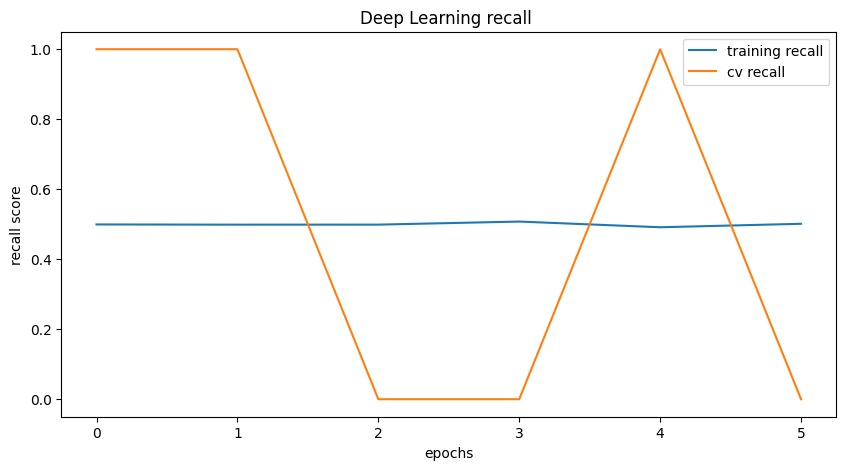

In [54]:
x = list(i for i in range(len(history_dict.get('loss'))))
graph_train_recall = history_dict.get('recall')
graph_test_recall = history_dict.get('val_recall')
plt.figure(figsize=(10, 5))
sns.lineplot(x=x,y=graph_train_recall, label='training recall')
sns.lineplot(x=x,y=graph_test_recall, label='cv recall')
plt.legend()
plt.title('Deep Learning recall ')
plt.xlabel('epochs')
plt.ylabel('recall score')

Text(0, 0.5, 'Accuracy')

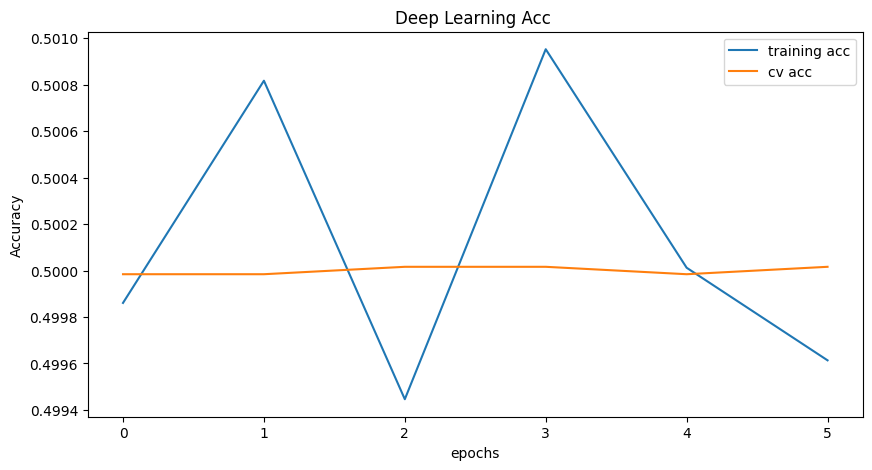

In [55]:
x = list(i for i in range(len(history_dict.get('loss'))))
graph_train_recall = history_dict.get('binary_accuracy')
graph_test_recall = history_dict.get('val_binary_accuracy')
plt.figure(figsize=(10, 5))
sns.lineplot(x=x,y=graph_train_recall, label='training acc')
sns.lineplot(x=x,y=graph_test_recall, label='cv acc')
plt.legend()
plt.title('Deep Learning Acc ')
plt.xlabel('epochs')
plt.ylabel('Accuracy')

Text(0, 0.5, 'loss score')

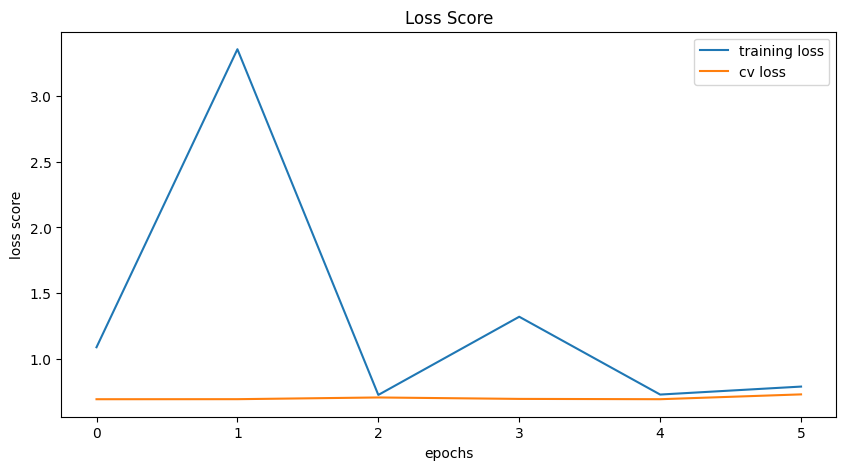

In [56]:
x = list(i for i in range(len(history_dict.get('loss'))))
graph_train_recall = history_dict.get('loss')
graph_test_recall = history_dict.get('val_loss')
plt.figure(figsize=(10, 5))
sns.lineplot(x=x,y=graph_train_recall, label='training loss')
sns.lineplot(x=x,y=graph_test_recall, label='cv loss')
plt.legend()
plt.title('Loss Score')
plt.xlabel('epochs')
plt.ylabel('loss score')

Loss Score가 낮은 0, 2,4 번째 가중치를 사용

Text(0, 0.5, 'precision score')

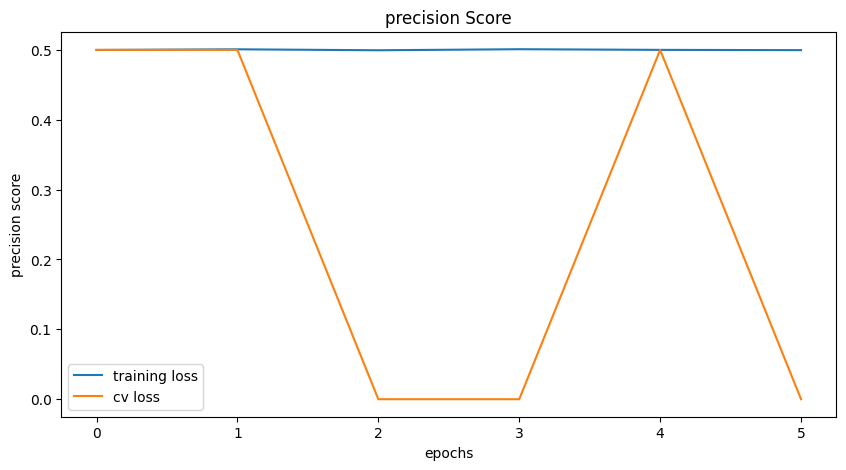

In [57]:
x = list(i for i in range(len(history_dict.get('loss'))))
graph_train_recall = history_dict.get('precision')
graph_test_recall = history_dict.get('val_precision')
plt.figure(figsize=(10, 5))
sns.lineplot(x=x,y=graph_train_recall, label='training loss')
sns.lineplot(x=x,y=graph_test_recall, label='cv loss')
plt.legend()
plt.title('precision Score')
plt.xlabel('epochs')
plt.ylabel('precision score')

In [58]:
# 
elu_neural_model.load_weights('./saved_models/005-0.694.h5')

In [59]:
predic_y = elu_neural_model.predict(X_test)

1143/1143 [==============================] - 2s 2ms/step


In [60]:
bin_y = (predic_y > .5).astype(int)
bin_y = bin_y.reshape(-1)

In [61]:
pd.DataFrame(data=bin_y).value_counts()

1    36557
dtype: int64

In [62]:
Y_test.value_counts()

Default
0          33619
1           2938
dtype: int64

In [63]:
from sklearn.metrics import recall_score, precision_score, f1_score, accuracy_score

In [64]:
recall_score(Y_test, bin_y)

1.0

### 채점 

In [65]:
accuracy_score(Y_test, bin_y), precision_score(Y_test, bin_y) , recall_score(Y_test, bin_y)

(0.08036764504746013, 0.08036764504746013, 1.0)